 # Prediction how likely and Individuals are going to receive their H1N1 and seasonal flu vaccines.

## Dataset Description

Dependent Variables

    h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
    
    seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

Independent Variables

You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

    h1n1_concern - Level of concern about the H1N1 flu.
        0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
        
    h1n1_knowledge - Level of knowledge about H1N1 flu.
        0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
        
    behavioral_antiviral_meds - Has taken antiviral medications. (binary)
    
    behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
    
    behavioral_face_mask - Has bought a face mask. (binary)
    
    behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
    
    behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
    
    behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
    
    behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
    
    doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
    
    doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
    
    chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
    
    child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
    
    health_worker - Is a healthcare worker. (binary)
    
    health_insurance - Has health insurance. (binary)
    
    opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
    
    opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
    
    opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
    
    opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
    
    opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
    
    opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
    
    age_group - Age group of respondent.
    
    education - Self-reported education level.
    
    race - Race of respondent.
    
    sex - Sex of respondent.
    
    income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
    
    marital_status - Marital status of respondent.
    
    rent_or_own - Housing situation of respondent.
    
    employment_status - Employment status of respondent.
    
    hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
    
    census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
    
    household_adults - Number of other adults in household, top-coded to 3.
    
    household_children - Number of children in household, top-coded to 3.
    
    employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
    
    employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

In [1]:
##importing the libraries needed for analysis of the dataset.

import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%cd "C:\Users\Thor_after_infinity\Desktop\ML Datasets\flu from data driven-20231101T061417Z-001"

C:\Users\Thor_after_infinity\Desktop\ML Datasets\flu from data driven-20231101T061417Z-001


    -> Train file is complete data including dependent variable(y) in this dataset we have two denpendent varables.

    -> Test file will not have dependent variable(y) which needs to be predicted using model built on train data sample     submission file is where predictions are copied for uploading into competition site for checking the result and accuracy

In [3]:
vaccinetrain=pd.read_csv('training_set_features.csv') # importing train file
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
vaccinetest=pd.read_csv('test_set_features.csv')# importing test file
vaccinetest.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [5]:
vaccinelabels=pd.read_csv('training_set_labels.csv')
# 2 dependent variables seasonal_vaccine and h1n1_vaccine
# seasonal_vaccine Balanced data
# h1n1_vaccine Imbalanced data

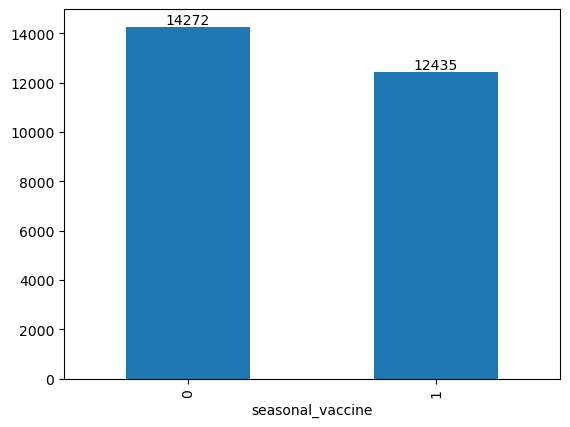

In [6]:
#seasonal vaccine -Balanced Data
ax= vaccinelabels.seasonal_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

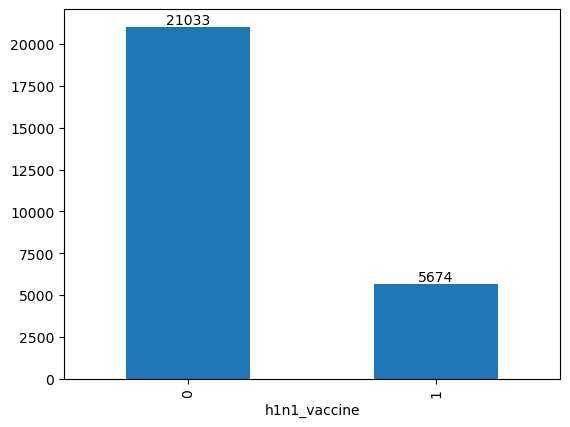

In [7]:
#h1n1 vaccine -ImBalanced Data
ax= vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

In [8]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [10]:
vaccinetrain.isnull().sum() #checking for null values

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [11]:
vaccinetest.isnull().sum() #checking for null values

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [12]:
#concatinate both the dataframes for preprocessing
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_months 

In [14]:
combinedf.isnull().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

In [15]:
combinedf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [16]:
combinedf=combinedf.drop('respondent_id',axis=1) #Droping the unique identifier

In [17]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [18]:
original=combinedf

In [19]:
mask=combinedf.isnull() #masking the null values

In [20]:
mask.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform) #Label Encoding the categorical Data.

In [23]:
combinedf=combinedf.where(~mask,original)

In [24]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [26]:
#imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy='most_frequent',max_iter=50)
# Imputing the missing values with IterativeImputer using the DecisionTree Classifier

In [27]:
#=imputer.fit_transform(combinedf)

In [28]:
#combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [29]:
#combinedf_impute.info()

In [30]:
#combinedf_impute.to_csv('vaccineimp.csv')

In [31]:
combinedf_impute=pd.read_csv('vaccineimp.csv')

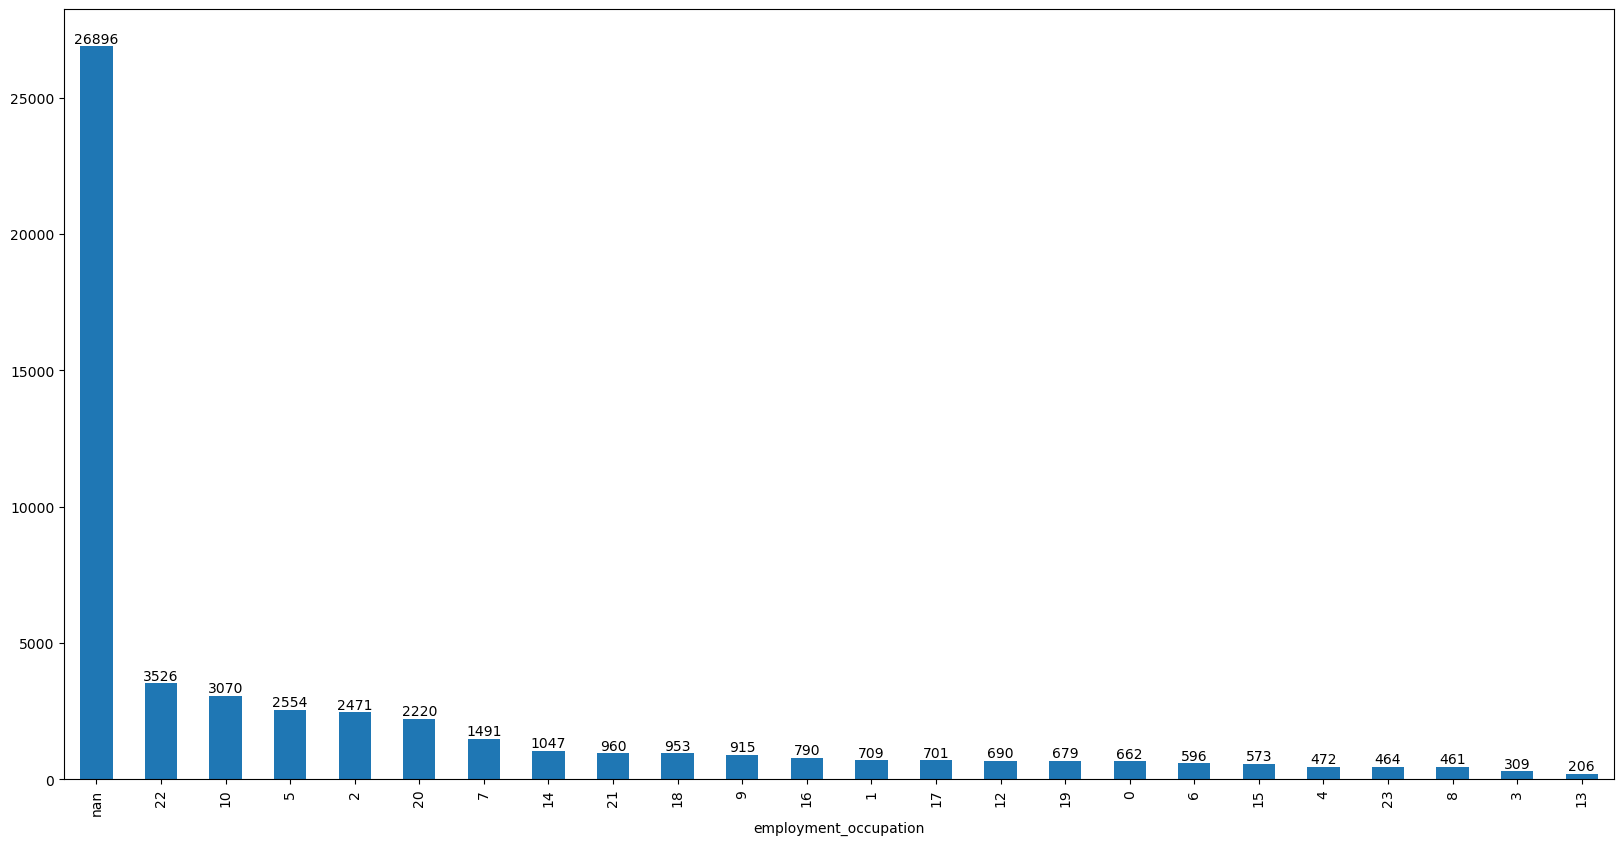

In [32]:
plt.figure(figsize=(20,10))
ax=combinedf.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

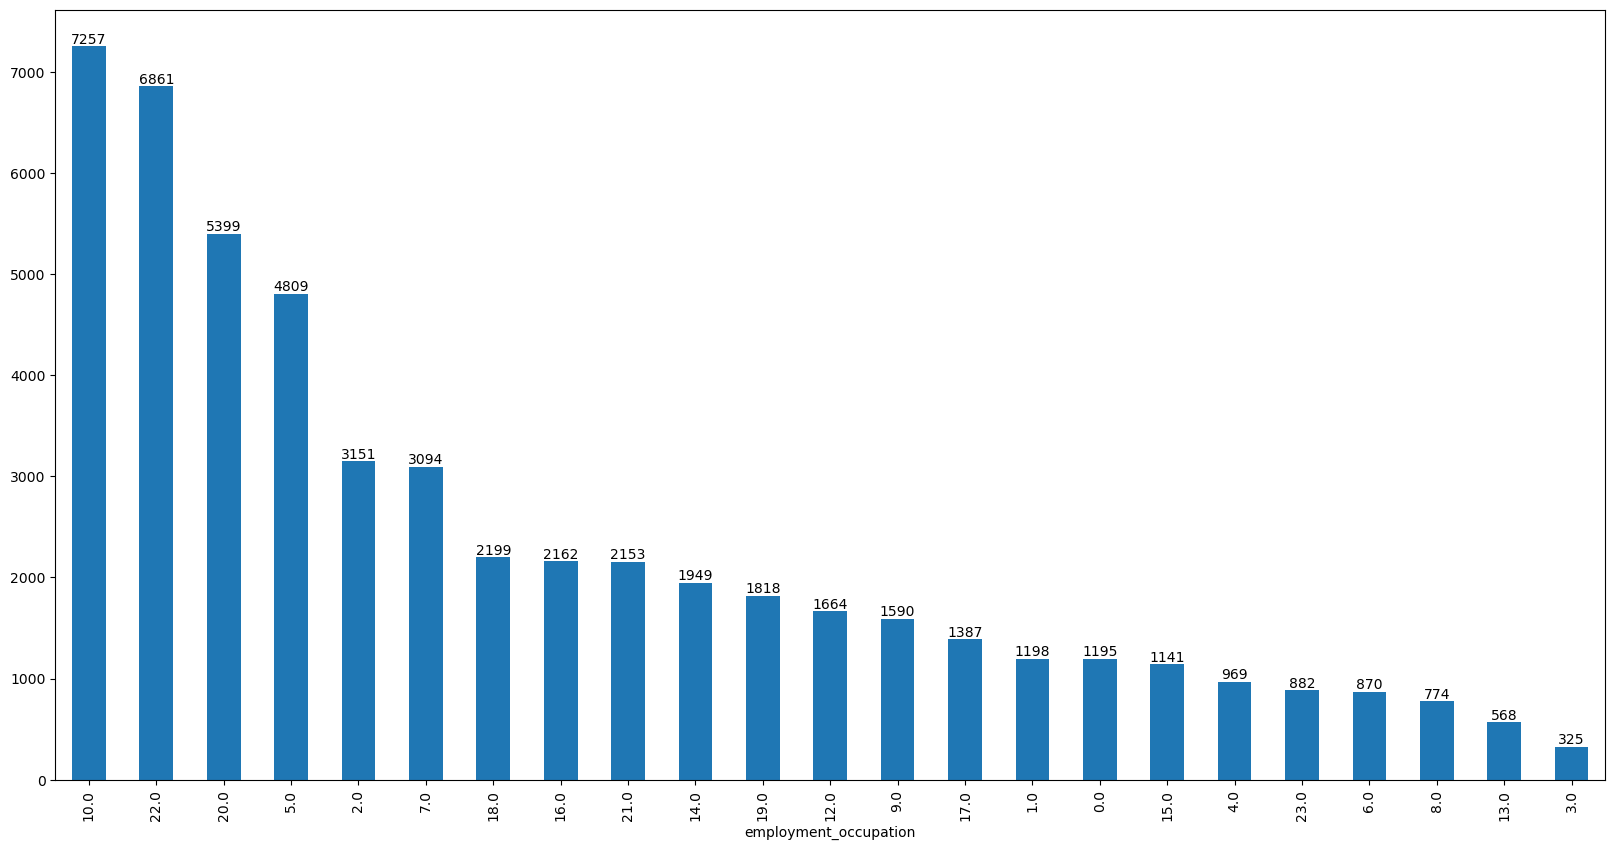

In [33]:
plt.figure(figsize=(20,10))
ax=combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
  ax.bar_label(i)

In [34]:
#split data back to train and test
vaccinetrain_df=combinedf_impute.loc[0:26706]
vaccinetest_df=combinedf_impute.loc[26707:53414]

In [35]:
print(vaccinetrain_df.shape)
print(vaccinetest_df.shape)

(26707, 36)
(26708, 36)


# EDA using vaccinetrain_df

<Axes: title={'center': 'Sex ratio'}, ylabel='count'>

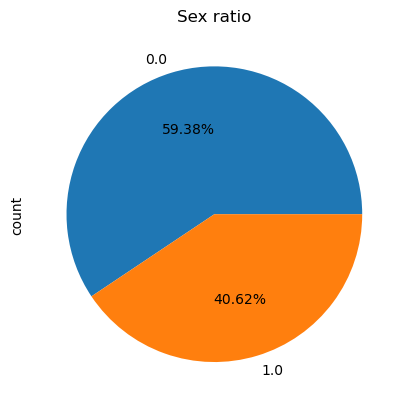

In [36]:
vaccinetrain_df.sex.value_counts().plot(kind='pie',autopct='%0.2f%%',title='Sex ratio')

<Axes: title={'center': 'Education Ratio'}, ylabel='count'>

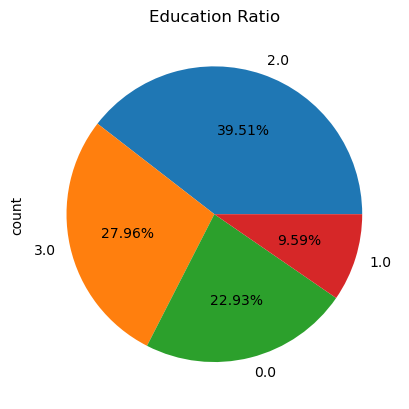

In [37]:
vaccinetrain_df.education.value_counts().plot(kind='pie',autopct='%0.2f%%',title="Education Ratio")

<Axes: title={'center': 'marital_status'}, ylabel='count'>

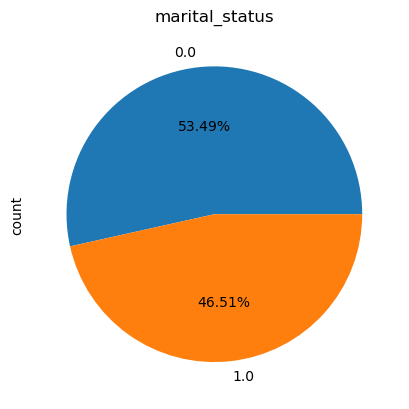

In [38]:
vaccinetrain_df.marital_status.value_counts().plot(kind='pie',autopct='%0.2f%%',title='marital_status')

<Axes: title={'center': 'health_insurance'}, ylabel='count'>

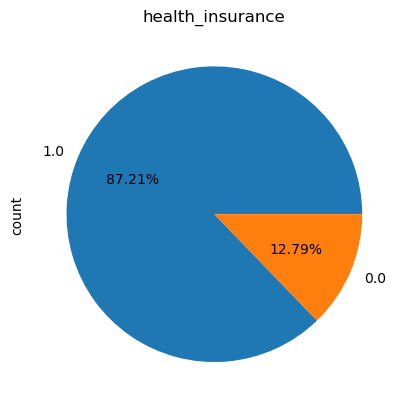

In [39]:
vaccinetrain_df.health_insurance.value_counts().plot(kind='pie',autopct='%0.2f%%',title='health_insurance')

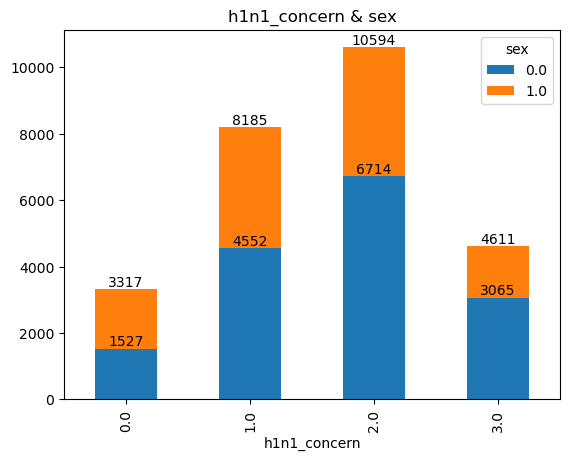

In [40]:
ax=pd.crosstab(vaccinetrain_df.h1n1_concern,vaccinetrain_df.sex).plot(kind='bar',stacked=True,title='h1n1_concern & sex')
for i in ax.containers:
    ax.bar_label(i)

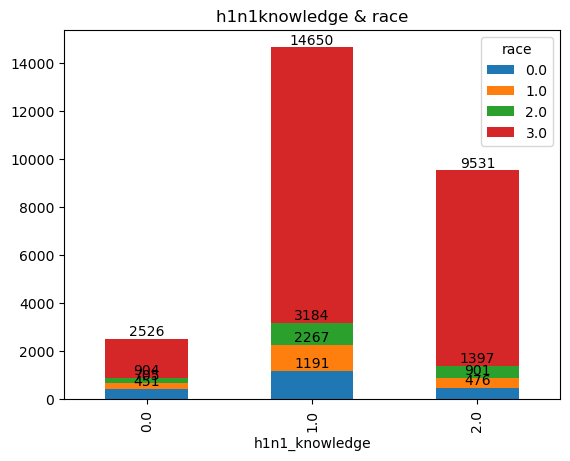

In [41]:
ax=pd.crosstab(vaccinetrain_df.h1n1_knowledge,vaccinetrain_df.race).plot(kind='bar',stacked=True,title='h1n1knowledge & race')
for i in ax.containers:
    ax.bar_label(i)

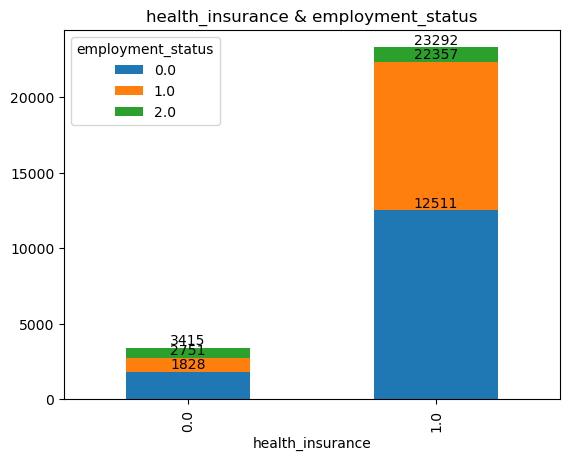

In [42]:
ax=pd.crosstab(vaccinetrain_df.health_insurance,vaccinetrain_df.employment_status).plot(kind='bar',stacked=True,title='health_insurance & employment_status')
for i in ax.containers:
    ax.bar_label(i)

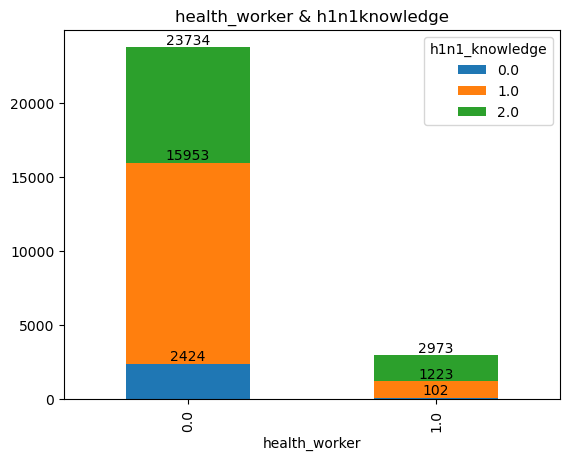

In [43]:
ax=pd.crosstab(vaccinetrain_df.health_worker,vaccinetrain_df.h1n1_knowledge).plot(kind='bar',stacked=True,title='health_worker & h1n1knowledge')
for i in ax.containers:
    ax.bar_label(i)

### Hypothesis Testing

In [44]:
from scipy.stats import chi2_contingency

In [45]:
# Test Null No Association between seasonal_vaccine & h1n1concern

chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.h1n1_concern))

#since pvalue=2.372084972186345e-143 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & h1n1concern

Chi2ContingencyResult(statistic=662.8597892036175, pvalue=2.372084972186345e-143, dof=3, expected_freq=array([[1772.57737672, 4373.99633055, 5661.34601415, 2464.08027858],
       [1544.42262328, 3811.00366945, 4932.65398585, 2146.91972142]]))

In [46]:
# Test Null No Association between seasonal_vaccine & h1n1knowledge

chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.h1n1_knowledge))

# since pvalue=1.899821403267988e-85 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & h1n1knowledge

Chi2ContingencyResult(statistic=390.1559460420392, pvalue=1.899821403267988e-85, dof=2, expected_freq=array([[1349.87351631, 7828.83888119, 5093.2876025 ],
       [1176.12648369, 6821.16111881, 4437.7123975 ]]))

In [47]:
# Test Null No Association between seasonal_vaccine & health_worker

chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.health_worker))

# since pvalue=1.5512230069917767e-91 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & health_worker

Chi2ContingencyResult(statistic=411.7156553801086, pvalue=1.5512230069917767e-91, dof=1, expected_freq=array([[12683.25337926,  1588.74662074],
       [11050.74662074,  1384.25337926]]))

In [48]:
# Test Null No Association between seasonal_vaccine & sex
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.sex))
# since pvalue=2.5248076319253385e-36 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & sex

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

In [49]:
# Test Null No Association between seasonal_vaccine & employment_status
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.employment_status))
# since pvalue=2.2776894636965105e-139 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & employment_status

Chi2ContingencyResult(statistic=638.4723327803031, pvalue=2.2776894636965105e-139, dof=2, expected_freq=array([[7662.64305238, 5754.86456734,  854.49238027],
       [6676.35694762, 5014.13543266,  744.50761973]]))

In [50]:
# Test Null No Association between seasonal_vaccine & education

chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.education))
# since  pvalue=1.2053204499781529e-30 is less than 0.05, Reject Null Hypothesis
#Alternative hypothesis true, there is association between seasonal_vaccine & education


Chi2ContingencyResult(statistic=142.3018921387373, pvalue=1.2053204499781529e-30, dof=3, expected_freq=array([[3273.14936159, 1369.11161868, 5638.90156139, 3990.83745834],
       [2851.85063841, 1192.88838132, 4913.09843861, 3477.16254166]]))

### Spliting into X and y for building the ML models.

In [51]:
y=vaccinelabels.h1n1_vaccine
X=vaccinetrain_df

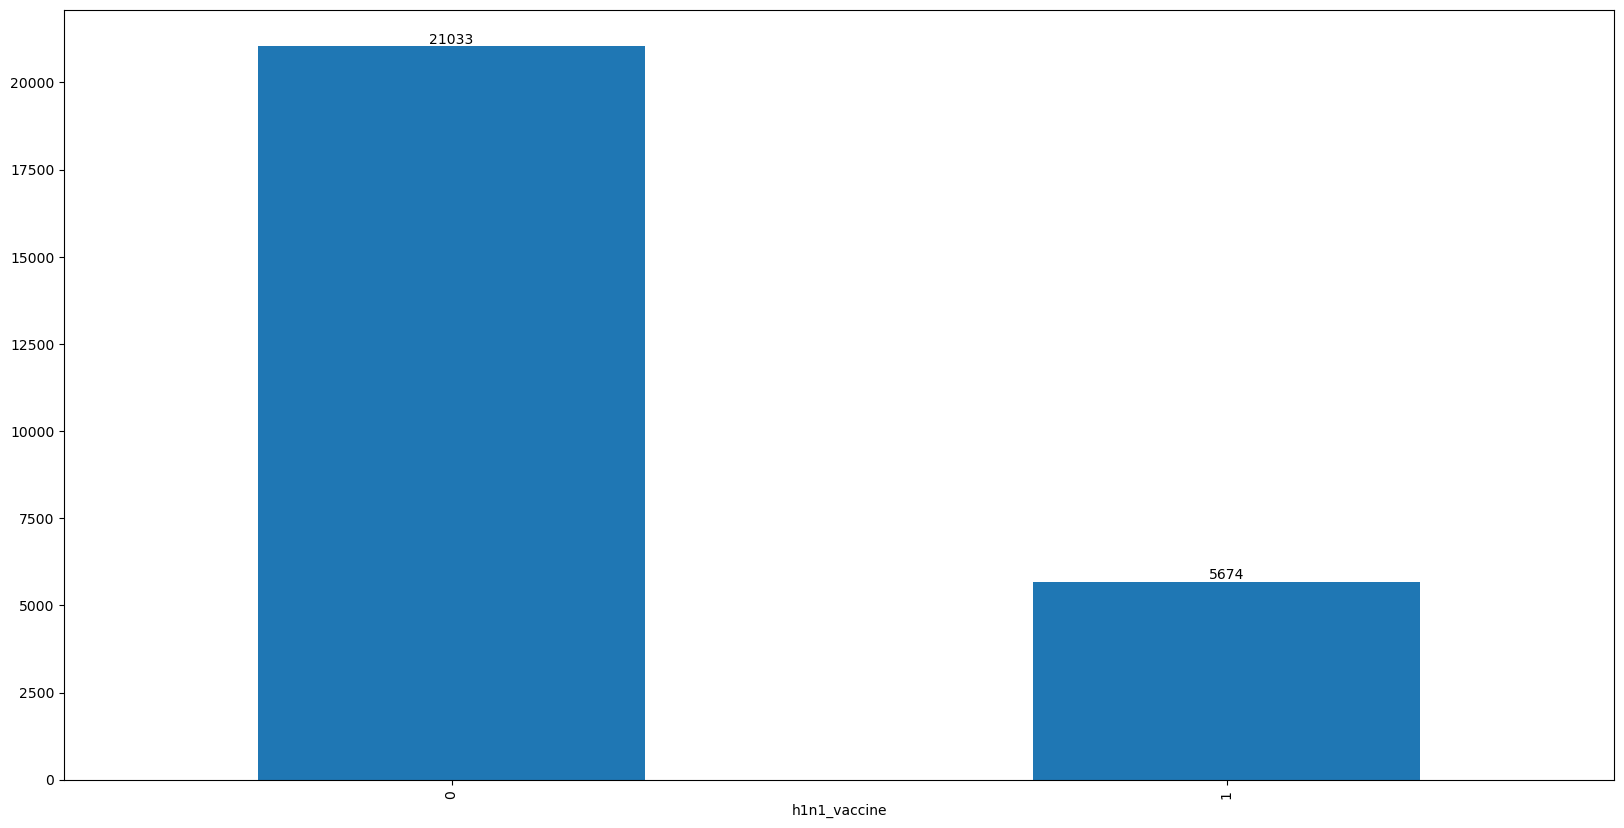

In [52]:
plt.figure(figsize=(20,10))
ax=y.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='h1n1_vaccine'>

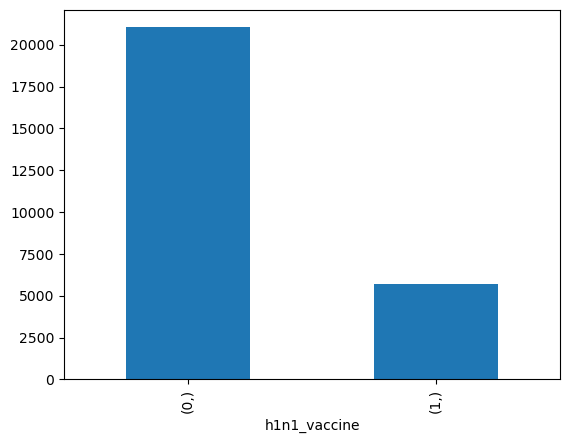

In [53]:
pd.DataFrame(y).value_counts().plot(kind='bar')# imbalance in classes or 
# levels-0- majority class(21033) & 1-minority classes(5674)

In [54]:
y=LabelEncoder().fit_transform(y)

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay

In [56]:
logit=LogisticRegression(max_iter=1000)

In [57]:
logitmodel=logit.fit(X,y)

In [58]:
logitmodel.score(X,y) # Accuracy

0.8185120005990939

In [59]:
logitpredict=logitmodel.predict(X)

In [60]:
print(classification_report(y,logitpredict))
# Minority class(1) predictions scores are worst.

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     21033
           1       0.64      0.34      0.44      5674

    accuracy                           0.82     26707
   macro avg       0.74      0.64      0.67     26707
weighted avg       0.80      0.82      0.80     26707



In [61]:
# Hence we are using somte to balanced the dependent variable y.

In [62]:
#!pip install imblearn

In [63]:
from imblearn.over_sampling import SMOTEN

In [64]:
smote=SMOTEN(random_state=42)

In [65]:
X_smote,y_smote=smote.fit_resample(X,y)

In [66]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())


0    21033
1     5674
Name: count, dtype: int64
0    21033
1    21033
Name: count, dtype: int64


In [67]:
logit_smote_model=logit.fit(X_smote,y_smote)

In [68]:
logit_smote_model.score(X_smote,y_smote)

0.827675557457329

In [69]:
logit_smote_predict=logit_smote_model.predict(X_smote)

In [70]:
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     21033
           1       0.83      0.83      0.83     21033

    accuracy                           0.83     42066
   macro avg       0.83      0.83      0.83     42066
weighted avg       0.83      0.83      0.83     42066



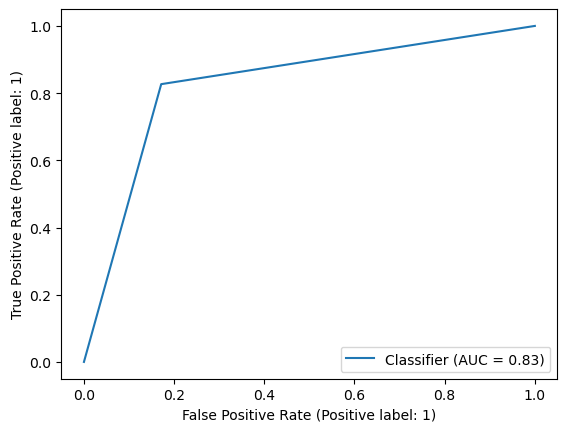

In [73]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_predict) 
# Hence after using the smote when see the good AUC.

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(logit,X_smote,y_smote)

array([0.55074875, 0.69986925, 0.88113634, 0.90811839, 0.91251634])

In [76]:
np.mean([0.55074875, 0.69986925, 0.88113634, 0.90811839, 0.91251634])

0.790477814

In [77]:
test_seasonal=logit_smote_model.predict_proba(vaccinetest_df)

In [78]:
pd.DataFrame(test_seasonal).to_csv('reg_h1n1.csv')

# Decission Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
tree=DecisionTreeClassifier(max_depth=12)

In [81]:
tree_smote_model=tree.fit(X_smote,y_smote)

In [82]:
tree_smote_model.score(X_smote,y_smote)

0.90284315123853

In [83]:
tree_smote_predict=tree_smote_model.predict(X_smote)

In [84]:
print(classification_report(y_smote,tree_smote_predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     21033
           1       0.90      0.91      0.90     21033

    accuracy                           0.90     42066
   macro avg       0.90      0.90      0.90     42066
weighted avg       0.90      0.90      0.90     42066



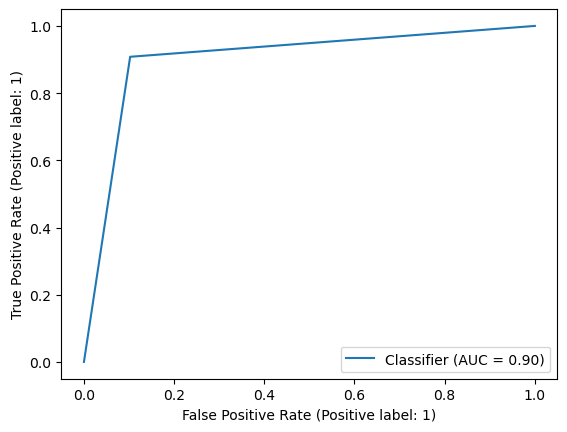

In [85]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_predict)

In [86]:
cross_val_score(tree,X_smote,y_smote)

array([0.22201093, 0.31772257, 0.47141329, 0.62890764, 0.47248306])

In [87]:
np.mean([0.22201093, 0.31772257, 0.47141329, 0.62890764, 0.47248306])

0.422507498

In [88]:
test_seasonal=tree_smote_model.predict_proba(vaccinetest_df)

In [89]:
pd.DataFrame(test_seasonal).to_csv('dtree_h1n1.csv')

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RF=RandomForestClassifier(n_estimators=3000,max_depth=12)

In [92]:
RFmodel=RF.fit(X_smote,y_smote)

In [93]:
RFmodel.score(X_smote,y_smote)

0.9210050872438549

In [94]:
RFpredict=RFmodel.predict(X_smote)

In [95]:
print(classification_report(y_smote,RFpredict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     21033
           1       0.93      0.91      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



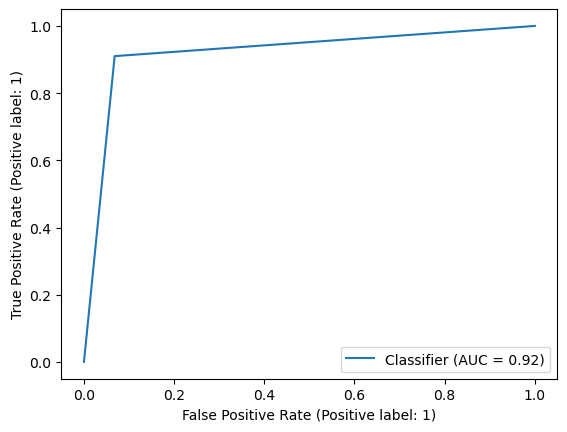

In [96]:
RocCurveDisplay.from_predictions(y_smote,RFpredict)

In [97]:
cross_val_score(RF,X_smote,y_smote)

array([0.22010934, 0.37144895, 0.7163913 , 0.9090693 , 0.48163556])

In [98]:
np.mean([0.22010934, 0.37144895, 0.7163913 , 0.9090693 , 0.48163556])

0.53973089

In [99]:
test_seasonal=RFmodel.predict_proba(vaccinetest_df)

In [100]:
pd.DataFrame(test_seasonal).to_csv('RF_h1n1.csv')

# Gradient Boosting 

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [103]:
gbm_smote_model=gbm.fit(X_smote,y_smote)

In [104]:
gbm_smote_model.score(X_smote,y_smote)

0.889697142585461

In [105]:
gbm_smote_predict=gbm_smote_model.predict(X_smote)

In [106]:
print(classification_report(y_smote,gbm_smote_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     21033
           1       0.90      0.88      0.89     21033

    accuracy                           0.89     42066
   macro avg       0.89      0.89      0.89     42066
weighted avg       0.89      0.89      0.89     42066



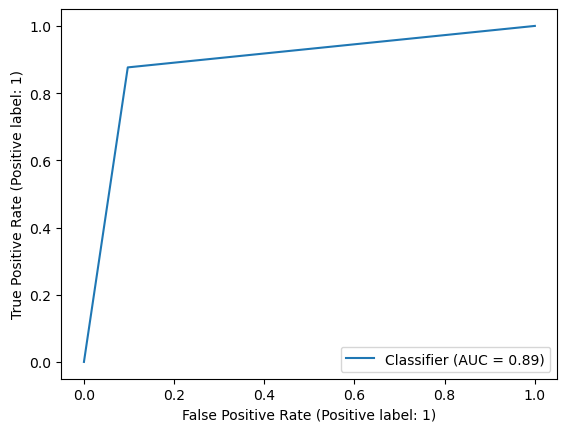

In [107]:
RocCurveDisplay.from_predictions(y_smote,gbm_smote_predict)

In [108]:
cross_val_score(gbm,X_smote,y_smote)

array([0.19206085, 0.32128848, 0.48591466, 0.48520147, 0.48650897])

In [109]:
np.mean([0.19206085, 0.32128848, 0.48591466, 0.48520147, 0.48650897])

0.394194886

In [110]:
test_seasonal=gbm_smote_model.predict_proba(vaccinetest_df)

In [111]:
pd.DataFrame(test_seasonal).to_csv('GBM_h1n1.csv')